# Subclasses

Sometimes we need a specialized version of a class, or multiple variations on a class. Rather than modifying the existing class, we can create a new class that inherits from the existing class. The new class is called a subclass, and the existing class is called the superclass.

Suppose we wanted a class Square that is like a rectangle but can be created from a single point and size. We can specify that a `square` is a kind of `rect`:

In [1]:
# Classes Point and Rect are repeated 
# from the previous chapter so we can
# build on them.  Point has a method 
# "dist" that we use for area of triangles. 

from numbers import Number
from math import sqrt

class Point:
    """An (x,y) coordinate pair"""
    def __init__(self, x: Number, y: Number):
        self.x = x
        self.y = y

    def __add__(self, d: "Point") -> "Point":
        """Point(x, y) + Point("""
        x = self.x + d.x
        y = self.y + d.y
        return Point(x,y)
        
    def move_to(self, new_x, new_y):
        """Change the coordinates of this Point"""
        self.x = new_x
        self.y = new_y
        
    def dist(self, other: "Point") -> Number: 
        """Euclidean distance"""
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx*dx + dy*dy)       
        
    def __str__(self) -> str:
        """Looks like (x, y)"""
        return f"({self.x}, {self.y})"
      
    def __repr__(self) -> str:
        """Looks like Point(x, y)"""
        return f"Point({self.x}, {self.y})"


class Rect:
    """Rectangle from lower left corner to upper right."""
    def __init__(self, xy_min: Point, xy_max: Point):
        self.min_pt = xy_min
        self.max_pt = xy_max
    
    def area(self) -> Number:
        """Area is height * width"""
        height = self.max_pt.x - self.min_pt.x
        width = self.max_pt.y - self.min_pt.y
        return height * width

    def translate(self, delta: Point) -> "Rect":
        """New rectangle offset from this one by delta as movement vector"""
        return Rect(self.min_pt + delta, self.max_pt + delta)

    def __repr__(self) -> str:
        return f"Rect({repr(self.min_pt)}, {repr(self.max_pt)}"

    def __str__(self) -> str:
        return f"Rect({str(self.min_pt)}, {str(self.max_pt)})"

In [2]:
class Square(Rect): # Square inherits from Rect
    """A square is a rectangle with equal sides"""

    def __init__(self, anchor:Point, size):
        self.min_pt = anchor
        self.max_pt = anchor + Point(size, size)
        self.size = size

Square objects have the min_pt and max_pt instance variables of Rect, plus a new instance variable size.
All the methods of Rect are also available for Square, including the magic methods like `__str__`.

In [3]:
p1 = Point(3, 5)
sq = Square(p1, 5)
print(sq)

Rect((3, 5), (8, 10))


# Overriding

okay, but maybe we don't want to use the same `__str__` method for Square as we do for Rect. We can override the `__str__` method in Square to provide a different implementation. 

In this case, we want sqr to have it's own `__str__` method.

In [6]:
class Square(Rect):
    """A Rectangle with equal length sides"""
    
    def __init__(self, anchor: Point, size: Number):
        self.min_pt = anchor
        self.max_pt = self.min_pt + Point(size, size)
        self.size = size

    def __str__(self) -> str:
        return f"Square({str(self.min_pt)}, {self.size})"

The new __str__ method of Square overrides the __str__ method of the Rect.

Now the same code as above:

In [7]:
p1 = Point(3, 5)
sq = Square(p1, 5)
print(sq)
s2 = sq.translate(Point(2,2))
print(s2)

Square((3, 5), 5)
Rect((5, 7), (10, 12))


The first print command uses the new __str__ method. The translate method is still inherited from Rect, and still returns a Rect object rather than a Square, so the second print command is printing that Rect object.

We can also add new methods that are not present in Rect. For example, we might simply want to add a method that returns the length of a side:

In [9]:
class Square(Rect):
    """A Rectangle with equal length sides"""
    
    def __init__(self, anchor: Point, size: Number):
        self.min_pt = anchor
        self.max_pt = self.min_pt + Point(size, size)
        self.size = size

    def __str__(self) -> str:
        return f"Square({str(self.min_pt)}, {self.size})"
    
    def side(self ) -> Number:
        return self.size

A method that is defined only in the Square subclass can of course use instance variables that are likewise only in that subclass. Now we can write

In [11]:
sq = Square(Point(2,2), 2)
sq.side()

2

We get the expected result, 2. However, if we attempt to call side on a Rect object that is not a Square object, we will get an error message.

In [12]:
# r = Rect(Point(2,2), Point(4,4))
# r.side()

AttributeError: 'Rect' object has no attribute 'side'

The Python debugger refers to both instance variables and methods as attributes. In this case it looked for the class of r and found it was a Rect, and it looked in class Rect for method side and did not find it.

The inherited translate method still returns a Rect. It seems more reasonable for translation of a Square to give us a Square, so we can again override the inherited method with a more specialized version:

In [13]:
class Square(Rect):
    """A Rectangle with equal length sides"""
    
    def __init__(self, anchor: Point, size: Number):
        self.min_pt = anchor
        self.max_pt = self.min_pt + Point(size, size)
        self.size = size

    def __str__(self) -> str:
        return f"Square({str(self.min_pt)}, {self.size})"
    
    def side(self ) -> Number:
        return self.size
    
    def translate(self, delta: Point) -> "Square":
        return Square(self.min_pt + delta, self.size)

Now translate produces a Square object, with the printed representation we want.

In [14]:
p1 = Point(3, 5)
sq = Square(p1, 5)
print(sq)
s2 = sq.translate(Point(2,2))
print(s2)

Square((3, 5), 5)
Square((5, 7), 5)


In [ ]:
# Inheritance - 

# Inheritance:

creating a new class from the old class, and adding new methods and/or overriding existing methods.

Parent, Base, or Super Class and Child, Derived, or Sub Class

Child classes contain additional attributes and methods that the parent class does not contain. However, the child class can still access all of the attributes and methods of the parent class.

Inheritance in humans - Inherit attributes and methods from the parent class

## Inheritance Types in Python: 

- Single Inheritance: A class inherits from a single parent class
- Multiple Inheritance: A class inherits from multiple parent classes
- Multilevel Inheritance: A class inherits from a child class
- Hierarchical Inheritance: Multiple child classes inherit from a single parent class.

# Types of Inheritence:

## Single Inheritance:
    Single inheritance refers to a scenario where a subclass inherits from a single superclass. In other words, a child class can have only one direct parent. This is the simplest and most commonly used type of inheritance in many programming languages like Java and C#. Here's a simple example:

```python
class Animal:
    def make_sound(self):
        pass

class Dog(Animal):
    def make_sound(self):
        return "Woof!"

class Cat(Animal):
    def make_sound(self):
        return "Meow!"
```   

## Multiple Inheritance:

Multiple inheritance allows a class to inherit from multiple superclasses. The child class will have access to the properties and behaviors of all its parent classes. While this provides great flexibility, it can also lead to ambiguity and potential conflicts when two or more parent classes define methods with the same name. Python is an example of a programming language that supports multiple inheritance. Here's an illustration:


```python
class A:
    def method_from_A(self):
        pass

class B:
    def method_from_B(self):
        pass

class C(A, B):
    def method_from_C(self):
        pass
```

In this example, the class C inherits from both A and B, allowing it to access methods from both superclasses.

## Multilevel Inheritance:

Multilevel inheritance occurs when a class is derived from another class, and that derived class is used as the base class for another class. It creates a chain of inheritance relationships. It's essential to ensure that the chain doesn't become overly complex, as it might lead to maintenance difficulties. Here's an example:

```python

class Vehicle:
    def drive(self):
        pass

class Car(Vehicle):
    def honk(self):
        pass

class ElectricCar(Car):
    def charge(self):
        pass
```

In this example, the class ElectricCar inherits from Car, which in turn inherits from Vehicle. This is a typical example of multilevel inheritance.

### Hierarchical Inheritance:

Hierarchical inheritance happens when multiple classes inherit from a single superclass. In other words, **there is one parent class**, and multiple child classes inherit from it. Each child class can add its own specialized functionalities while sharing common features from the parent class. Here's an example:

```python

class Shape:
    def draw(self):
        pass

class Circle(Shape):
    def draw(self):
        # Code to draw a circle
        pass

class Square(Shape):
    def draw(self):
        # Code to draw a square
        pass

```

### Hybrid Inheritance:

Hybrid inheritance is a combination of multiple inheritance and hierarchical inheritance. It involves the inheritance of multiple classes and the formation of a hierarchical structure. Languages that support multiple inheritance can give rise to hybrid inheritance scenarios.

Remember, inheritance should be used judiciously, and class relationships should be well thought out to maintain code clarity and avoid potential issues like the "diamond problem" in multiple inheritance. The diamond problem occurs when a class inherits from two classes that have a common ancestor, leading to ambiguity. Some languages provide mechanisms to handle such conflicts, like virtual inheritance in C++.

# The liskov substitution principle:

Can we override methods any way we like? For example, could we have have written the following definition of translate for class Square?

In [15]:
def translate(self, dx: Number, dy: Number) -> "Square":
    delta = Point(dx, dy)
    return Square(self.min_pt + delta, self.size)

Python would allow this, but it is a very bad idea. In Python, as in many object-oriented languages, we expect a subclass to also act as a subtype.

What does it mean for one class to be a subtype of another? The widely accepted answer is that a subtype may safely be used wherever its supertype could be used. For example, if Square is not only a subclass of `Rect`, but also a subtype of Rect, then any code that would behave correctly with a value v that is a `Rect` should also act correctly if the value of v is a Square. 

We could say “A Squares is a Rects”, and in fact some programmers call subtyping the is-a relation. This is also called the Liskov substitution principle, for Nancy Liskov of M.I.T. who proposed it.

For a square to be usable everywhere a `Rect` is usable, each method overridden in Square must be compatible with the corresponding method in `Rect`.

What does it mean for the translate of Square to be compatible with the translate of Rect? 

- of course, it should have the same number of arguements or parameters and return type.

An argument in the overriding method is compatible if it accepts everything that the inherited method accepts, so it should be equal or a supertype of the argument type of the inherited method. The result type should be what we would expect from the inherited method, so it should be equal or a subtype of the return type of the inherited method.

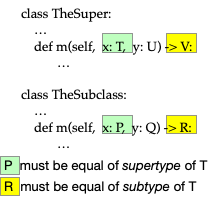

# Liskov in Simple terms:

objects of a superclass should be replaceable with objects of its subclasses without breaking the application. That requires the objects of your subclasses to behave in the same way as the objects of your superclass.

Liskov is the L in SOLID, which is a mnemonic acronym for the first five principles of object-oriented design.

**S - Single Responsibility Principle (SRP):**
A class should have only one reason to change, which means it should have only one responsibility. In other words, a class should encapsulate one and only one aspect of functionality. This principle helps keep classes focused, easy to understand, and maintainable.

**O - Open/Closed Principle (OCP):**
Software entities (classes, modules, functions, etc.) should be open for extension but closed for modification. This means that you should be able to add new features or behaviors to a class without modifying its existing code. This is typically achieved through the use of inheritance, interfaces, and abstraction.

**L - Liskov Substitution Principle (LSP):**
Derived (child) classes must be substitutable for their base (parent) classes without affecting the correctness of the program. In other words, objects of a base class should be replaceable with objects of its derived classes without causing any unexpected behavior. This principle ensures that inheritance relationships are correctly designed.

**I - Interface Segregation Principle (ISP):**
Clients should not be forced to depend on interfaces they do not use. In other words, a class should not be required to implement methods it doesn't need. Instead of having a large, monolithic interface, it's better to have smaller, specific interfaces tailored to the needs of individual classes.

**D - Dependency Inversion Principle (DIP):**
High-level modules should not depend on low-level modules; both should depend on abstractions. Abstractions should not depend on details; details should depend on abstractions. This principle encourages the use of dependency injection and inversion of control to decouple classes and improve flexibility.

# Abstract Classes:

So far we have used inheritance as a way to avoid repetitive code by reusing (inheriting) methods in subclasses. Considering the Liskov substitution principle and the way subclasses are treated as subtypes, you might wonder whether sometimes it might be useful to create a superclass and a set of subclasses even though there is little or nothing to inherit. Our purpose might be the subtype relation, knowing (and documenting) that any of the subtypes can be used where the supertype is expected. This is not only possible but common.

We have a simple class `Rect` and a subclass `Square`, and although we overrode many of the `Rect` methods in `Square`, at least one method (area) is inherited. Suppose now we also want a class `Triangle`.

A triangle is not defined by two corners, and its area is not computed in the same way as the area of a `Rect`. And yet we can write an area method, with a completely different implementation, that is called in the same way and has the same meaning. 

It is easy to imagine a loop that sums up the area of a mixed lists of triangles and rectangles. It is useful for a class `Triangle` and class Rect to be subclasses of a single superclass `Shape`, even though there may be nothing that Triangle and Rect can inherit.
